# Visualize domains and aggregated results

In [1]:
import os
import pandas as pd
import numpy as np

#Developed libraries for working with simulation results
import plots.saturated_steady_state as sssp
import analyses.transient as translys
from data_reader import data_processing as proc

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Parent directories

In [2]:
results_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
output_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
raw_dir = "E:/Richards_flow"

# Reactive species: Concentration profiles-1D and 2D
- Defining the function for flux averaged concentrations of reactive species in 1D domain
- Defining the function for heatmaps of reactive species concentrations in 2D
- Plotting select scenarios in 1D and 2D

In [3]:
def profile1d(Trial):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

    #Defining base figure parameters
    dashedline = mlines.Line2D([], [], linestyle = '--', color='grey', markersize=15, label='Homogeneous')
    solidline = mlines.Line2D([], [], linestyle = 'solid', color='grey', markersize=15, label='Heterogeneous')
    blue_patch = mpatches.Patch(color="blue", label= 'Ammonium', alpha = 0.5)
    red_patch = mpatches.Patch(color = "red", label =  'DO', alpha = 0.5)
    black_patch = mpatches.Patch(color="black", label= 'DOC', alpha = 0.5)
    green_patch = mpatches.Patch(color="darkgreen", label='Nitrate', alpha = 0.5)
    patchlist = [blue_patch, green_patch, red_patch, black_patch, dashedline, solidline]
    legendsize = 16
    axissize = 16
    ticksize = 14
    titlesize = 20        
    
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    gvarnames = ["DO", "DOC", "Ammonium", "Nitrate"]
    cvars = list(species[g]['TecIndex'] for g in gvarnames)
    velindex = 2
    colors = ["red", "black", "blue", "darkgreen"]
    columntitles = ["Slow flow", "Medium flow", "Fast flow"]
    pad = 230 
    figbig, axes = plt.subplots(3,3, figsize=(13, 10), sharey = True, sharex = True)
    for t in Trial:
        for r in Regimes:
            fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
            datah = np.load(fileh)
            i = Trial.index(t)*len(Regimes) + Regimes.index(r)
            host = axes.flat[i]
            file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,50,0,30, 51, gvarnames,"Unsaturated")
            conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,50,0,30, 51, gvarnames,"Unsaturated")
            yindex = list(range(51))
            #fig, host = axe.subplots()
            host.plot(conctimeh[-1, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-.")
            host.plot(conctime[-1, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-")
            host.plot(conctimeh[-1, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-.")
            host.plot(conctime[-1, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-",)
            par1 = host.twiny()
            par2 = host.twiny()
    
            # Offset the top spine of par2.  The ticks and label have already been
            # placed on the top by twiny above.
            par2.spines["top"].set_position(("axes", 1.2))
            # Having been created by twinx, par2 has its frame off, so the line of its
            # detached spine is invisible.  First, activate the frame but make the patch
            # and spines invisible.
            make_patch_spines_invisible(par2)
            # Second, show the right spine.
        
            par1.plot(conctimeh[-1, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-.")
            par1.plot(conctime[-1, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-")
            par2.plot(conctimeh[-1, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-.")
            par2.plot(conctime[-1, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-")
    
            host.set_ylim(0, 51)
            host.set_xlim(0, 800)
            par1.set_xlim(30, 60)
            par2.set_xlim(50, 260)
            host.xaxis.label.set_color("black")
            tkw = dict(size=4, width=1.5, labelsize=ticksize)
            host.tick_params(axis="x", colors="black", **tkw)
            host.tick_params(axis="y", **tkw)
            if i < 3:
                host.set_title (r + " flow", fontsize = axissize)
                par2.spines["top"].set_visible(True)
                par1.xaxis.label.set_color("blue")
                par2.xaxis.label.set_color("darkgreen")
                par1.tick_params(axis="x", colors="blue", **tkw)
                par2.tick_params(axis="x", colors="darkgreen", **tkw)
                par1.set_xlabel(str(gvarnames[2]) + " (uM)", fontsize=axissize)
                par2.set_xlabel(str(gvarnames[3]) + " (uM)", fontsize=axissize)
            elif i > 5:
                host.set_xlabel("DOC, DO (uM)", fontsize=axissize)
                par1.set_xticks([])
                par2.set_xticks([])
            else:
                par1.set_xticks([])
                par2.set_xticks([])
    figbig.gca().invert_yaxis()
    figbig.subplots_adjust(top=1.0, hspace = 0.2, wspace = 0.2)               
    for t,a in zip(Trial[::-1],range(3)):
        plt.annotate("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                     xy=(0.1, 0.17), xytext=(-50, 0.7 + pad*a),
                    xycoords='figure fraction', textcoords='offset points',
                    rotation = "vertical",
                    size='large', ha='center', va='baseline',
                    fontsize = 16)
        axes.flat[3*a].set_ylabel("Y (cm)", fontsize=axissize)
    plt.legend(handles = patchlist, ncol = 3, fontsize = legendsize,
               bbox_to_anchor = (-0.2,-0.6),
               loc = 'lower right')
    
    return None

def profile2d(Trial, gvarnames):
    import matplotlib.gridspec as gridspec
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    velindex = 2
    colorscheme = 'YlGnBu'
    columntitles = ["Velocity\ndistribution pattern", "Slow\nflow", "Medium\nflow", "Fast\nflow"]
    fig = plt.figure(figsize=(14, 20))
    outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
    pad = 210
    for t in Trial:
        file = os.path.join(raw_dir, "EqualAR_0/EqualAR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        left = gridspec.GridSpecFromSubplotSpec(1, 1,
                    subplot_spec=outer[4*Trial.index(t)], wspace=0.3, hspace=0.1)
        axe = plt.Subplot(fig, left[0])
        velocity = abs(data[velindex, -1, :, :])
        sns.heatmap(velocity, cmap = colorscheme, ax = axe, cbar = False)
        axe.set_ylabel ("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                       rotation = "vertical", fontsize = 16, ha = "center")
        axe.set_xticks([])
        axe.set_yticks([])
        fig.add_subplot(axe)
    
        for r in Regimes:
            i = Trial.index(t)*len(Regimes) + Regimes.index(r) + Trial.index(t) + 1
            if i%4 != 0:
                inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                         subplot_spec=outer[i], wspace=0.4, hspace=0.15)
                file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
                data = np.load(file)
                for g in gvarnames:
                    axe = plt.Subplot(fig, inner[gvarnames.index(g)])
                    sns.heatmap (data[species[g]["TecIndex"], -1, :, :], cmap = colorscheme, ax= axe)
                    axe.set_title(g, fontsize = 13, ha = "center")
                    axe.set_xticks([])
                    axe.set_yticks([])
                    fig.add_subplot(axe)
    for a in range(4):
        plt.annotate(columntitles[a], xy=(0.15, 0.92), xytext=(0.0 + pad*a, 10),
                    xycoords='figure fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline',
                    fontsize = 16)
    #fig.show()
    
    return None

## Reactive species: 1D profile

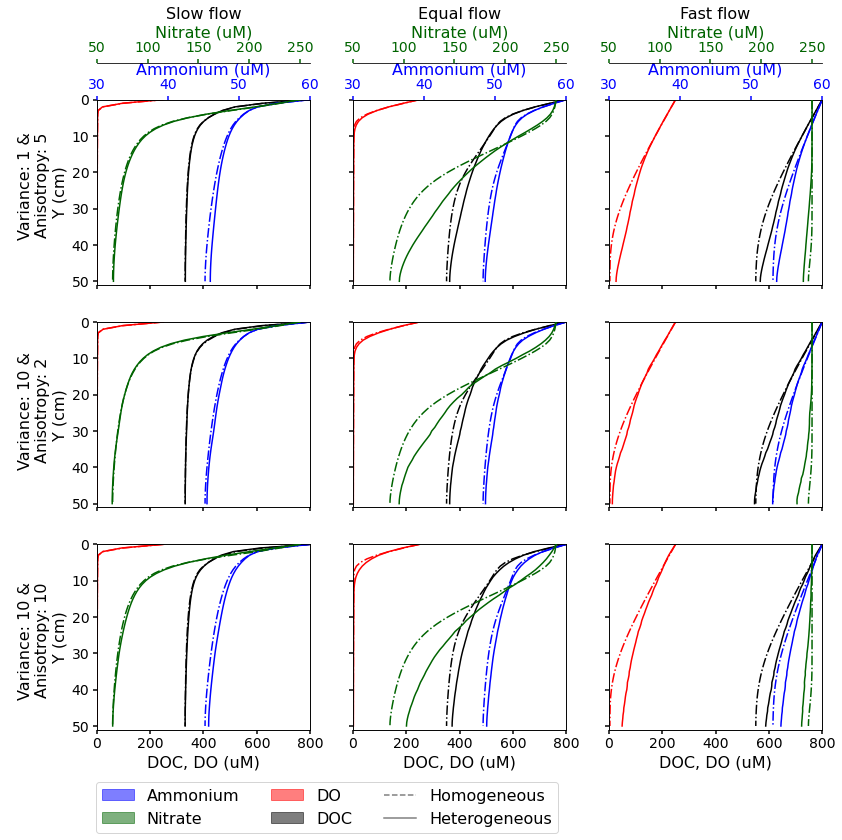

In [4]:
modeltrial = ["50", "73", "63"]
profile1d(modeltrial)
#picname = os.path.join(output_dir, "dissolved_species_1D.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#picname = os.path.join(ouput_dir, "dissolved_species_1D.pdf")
#plt.savefig(picname, bbox_inches = 'tight', pad_inches = 0.1)

### Reactive species: 1D profile: Takeaways
- The flux averaged concentration profile follows trends of the saturated scenarios.
- Homogeneous domain has higher or equal removal of reactive species compared to the heterogeneous scenarios with the exception of Nitrate in the fast flow regime.
- Exception: Nitrate is consumed to a higher extent in the heterogeneous domains in the fast flow regime compared to the base case (homogeneous domain).

## Reactice species: 2D profile/heatmaps

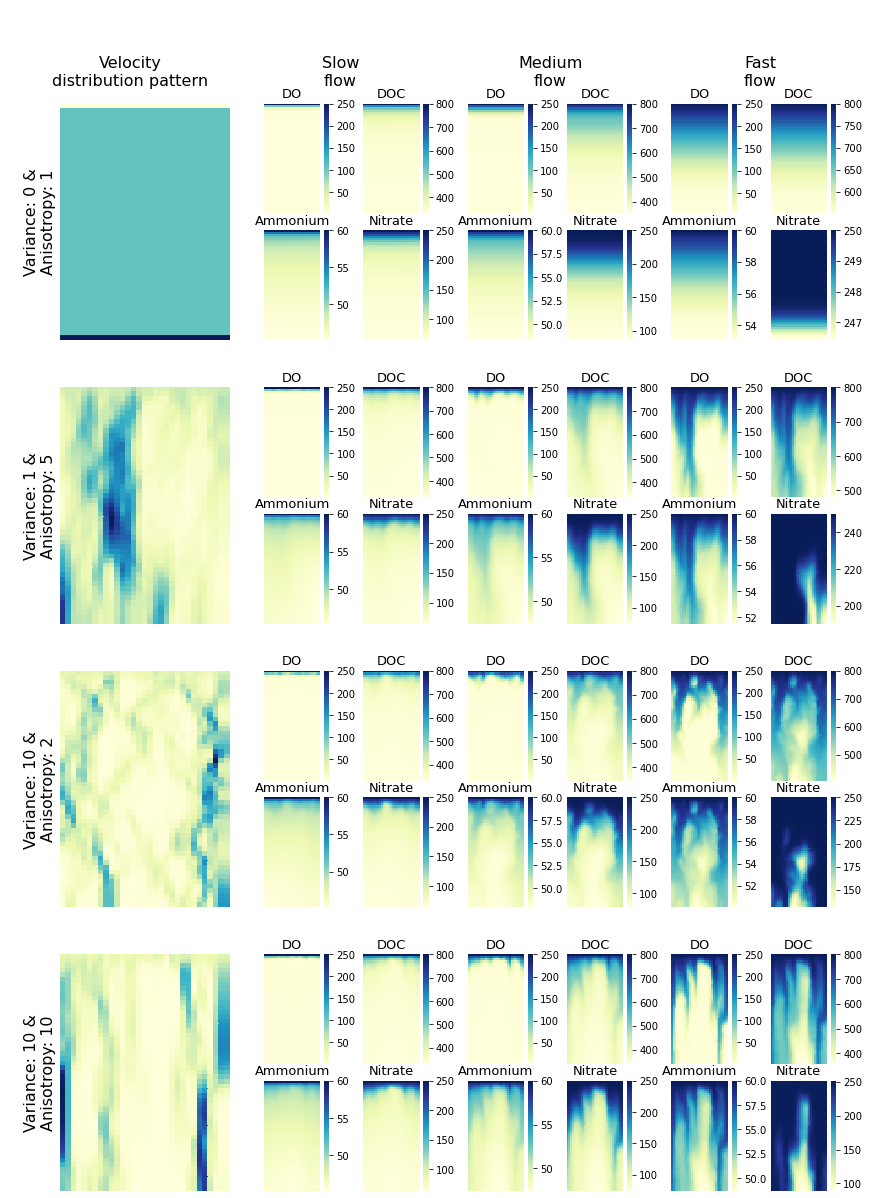

In [5]:
profile2d(["H","50","73","63"], ["DO", "DOC", "Ammonium", "Nitrate"])

### Reactive species: 2D profile: Takeaways

- DOC/DO are persistent along preferential flowpaths
- Reduction of nitrate kicks in further downgradient along the preferential flowpaths (if at all) or in low permeability zones.

# Visualize velocities and saturation for context

- Units of velocity are m/d
- P is Pressure (kPa)
- Sat is saturation (m3/m3) varying betwen 0.2 and 0.8. So sat = 0.8 means effective saturation = 1, and sat = 0.2 means effective saturation = 0

<ipython-input-6-8de7505a5036>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


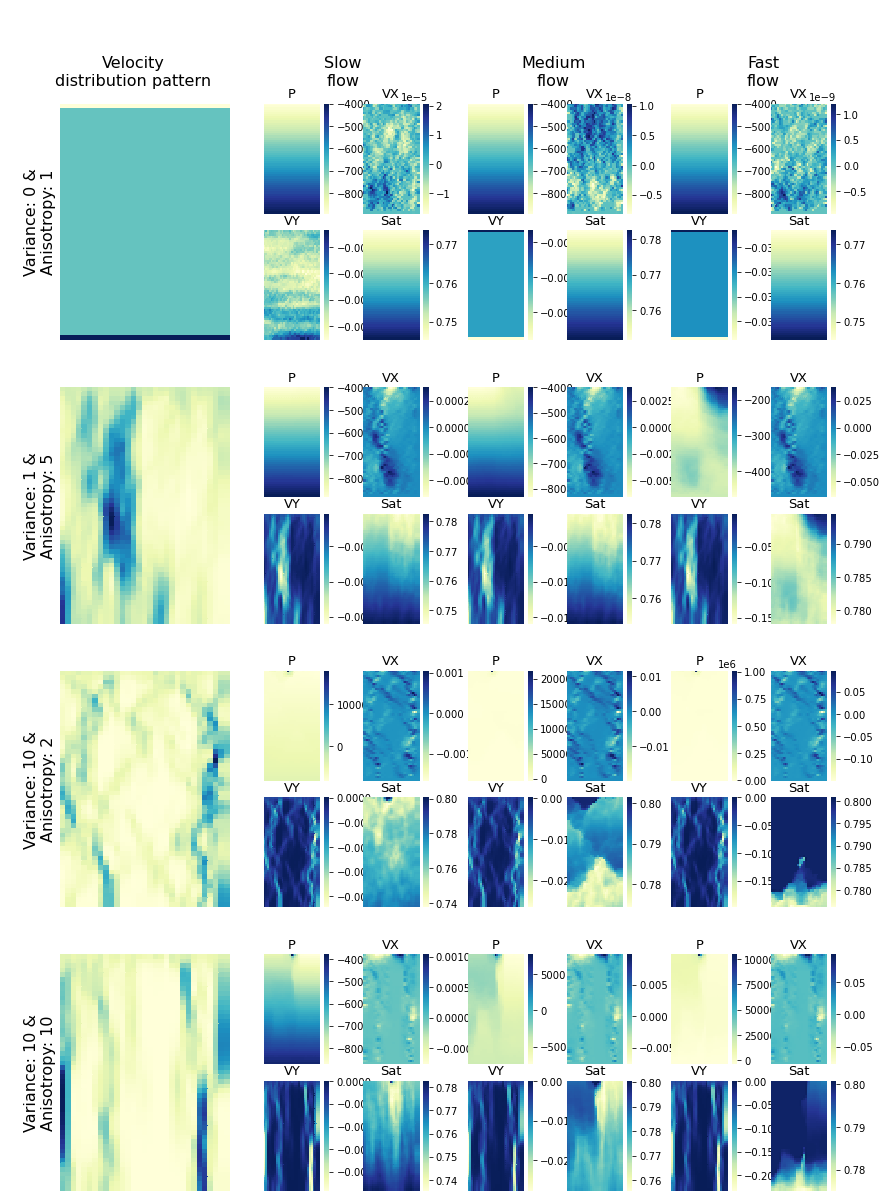

In [6]:
import matplotlib.gridspec as gridspec
Regimes = ["Slow", "Equal", "Fast"]
trialist = proc.masterscenarios()
Trial = ["H","50", "73", "63"]
species = proc.speciesdict("Unsaturated")
gvarnames = ["P","VX", "VY", "Sat"]
gindx = [0,1,2,4]
velindex = 2
colorscheme = 'YlGnBu'
columntitles = ["Velocity\ndistribution pattern", "Slow\nflow", "Medium\nflow", "Fast\nflow"]
fig = plt.figure(figsize=(14, 20))
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
pad = 210
for t in Trial:
    file = os.path.join(raw_dir, "EqualAR_0/EqualAR_0_RF-A"+str(t)+"_df.npy")
    data = np.load(file)
    left = gridspec.GridSpecFromSubplotSpec(1, 1,
                subplot_spec=outer[4*Trial.index(t)], wspace=0.3, hspace=0.1)
    axe = plt.Subplot(fig, left[0])
    velocity = abs(data[velindex, -1, :, :])
    sns.heatmap(velocity, cmap = colorscheme, ax = axe, cbar = False)
    axe.set_ylabel ("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                       rotation = "vertical", fontsize = 16, ha = "center")
    axe.set_xticks([])
    axe.set_yticks([])
    fig.add_subplot(axe)    
    for r in Regimes:
        i = Trial.index(t)*len(Regimes) + Regimes.index(r) + Trial.index(t) + 1
        if i%4 != 0:
            inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                        subplot_spec=outer[i], wspace=0.4, hspace=0.15)
            file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            for g in gvarnames:
                axe = plt.Subplot(fig, inner[gvarnames.index(g)])
                sns.heatmap (data[gindx[gvarnames.index(g)], -1, :, :], cmap = colorscheme, ax= axe)
                axe.set_title(g, fontsize = 13, ha = "center")
                axe.set_xticks([])
                axe.set_yticks([])
                fig.add_subplot(axe)
for a in range(4):
    plt.annotate(columntitles[a], xy=(0.15, 0.92), xytext=(0.0 + pad*a, 10),
                xycoords='figure fraction', textcoords='offset points',
                size='large', ha='center', va='baseline',
                fontsize = 16)
fig.show()

## Reactive species: Aggregated results: Change in mass flux

- Aggregated results can be visualized as:
 - Change in mass flux in the domain normalized by that in the base case
 - Change in flux averaged concentrations between inlet and outlet normalized by that in the base case

### Import data and explore values

In [7]:
filename = "concdata_10022021.csv"
mfdata = pd.read_csv(os.path.join(results_dir, filename), sep = "\t")
print(mfdata.shape)
print(mfdata.columns)
filename = "conc_comparison_14022021.csv"
mfdata_comparison = pd.read_csv(os.path.join(results_dir, filename), sep = "\t")
print(mfdata_comparison.shape)
print(mfdata_comparison.columns)

(882, 12)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'conc_in',
       'conc_out', 'delconc', 'reldelconc', 'normconc', 'Time', 'fraction'],
      dtype='object')
(882, 17)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'conc_in',
       'conc_out', 'delconc', 'reldelconc', 'normconc', 'Time', 'fraction',
       'spatial_normconc_base', 'spatial_reldelconc_base',
       'normconc_spatial_fraction', 'reldelconc_spatial_fraction', 'Da63'],
      dtype='object')


In [8]:
# How many regimes and what are they called? Which chemical species?
print(mfdata.Regime.unique())
print(mfdata.Chem.unique())
print(mfdata_comparison.Regime.unique())
print(mfdata_comparison.Chem.unique())

['Medium' 'Fast' 'Slow']
['DOC' 'DO' 'Nitrate' 'Ammonium' 'Nitrogen' 'TOC']
['Medium' 'Fast' 'Slow']
['DOC' 'DO' 'Nitrate' 'Ammonium' 'Nitrogen' 'TOC']


### Scatter plot of removal of reactive species in each domain with change in breakthrough time

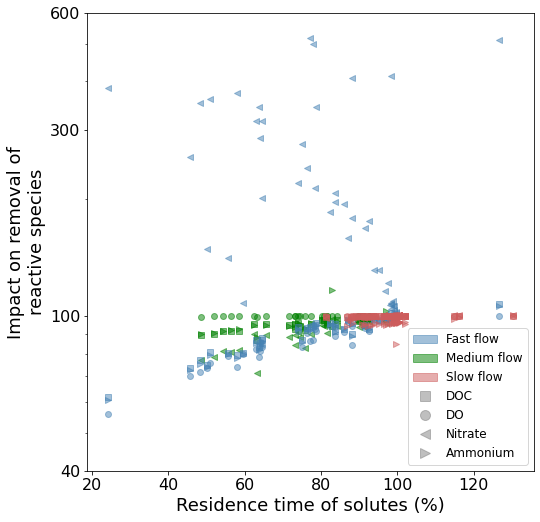

In [9]:
#Defining base parameters for figures
grey_dot = mlines.Line2D([], [], linestyle = '', marker = "o", markerfacecolor = "grey", markeredgecolor = "grey", markersize=10, label='DO', alpha = 0.5)
grey_triangle = mlines.Line2D([], [], linestyle = '', marker = "^", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='Nitrogen', alpha = 0.5)
grey_square = mlines.Line2D([], [], linestyle = '', marker = "s", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='DOC', alpha = 0.5)
empty_square = mlines.Line2D([], [], linestyle = '', marker = "d", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='TOC', alpha = 0.5)
empty_triangle = mlines.Line2D([], [], linestyle = '', marker = "<", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='Nitrate', alpha = 0.5)
empty_diamond = mlines.Line2D([], [], linestyle = '', marker = ">", markerfacecolor = "grey", markeredgecolor = "grey",markersize=10, label='Ammonium', alpha = 0.5)
my_pal = {3:"indianred", 2: "g", 0:"steelblue", 1 :"orange",
          "Slow":"indianred", "Medium": "g", "Fast":"steelblue"}
blue_patch = mpatches.Patch(color="steelblue", label= "Fast flow", alpha = 0.5)
green_patch = mpatches.Patch(color="g", label="Medium flow", alpha = 0.5)
red_patch = mpatches.Patch(color="indianred", label="Slow flow", alpha = 0.5)
#patchlist = [blue_patch, green_patch, red_patch, grey_square, empty_square, grey_dot, grey_triangle, empty_triangle, empty_diamond]
patchlist = [blue_patch, green_patch, red_patch, grey_square, grey_dot, empty_triangle, empty_diamond]
regimes = ["Slow", "Medium", "Fast"]
mymarklist = {'DOC': 's', 'TOC' : 'd', 'DO': 'o', 'Nitrogen': '^', 'Ammonium' : '>', 'Nitrate':'<'}

#Plotting
finaldata = mfdata_comparison
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize=(8,8))
for r in regimes:
    subset = finaldata[finaldata.Regime==r]
    for g in ["DO", "DOC", "Nitrate", "Ammonium"]:
        data = subset[subset.Chem==g]
        #plt.scatter(data["fraction"]*100, 100*data['reldelmassflux_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        plt.scatter(data["fraction"]*100, 100*data['reldelconc_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
plt.yscale("log")
plt.yticks((40,100,300,600), (40,100,300,600))
plt.tick_params(labelsize = 16)
plt.legend(handles = patchlist, fontsize = 12)
plt.xlabel ("Residence time of solutes (%)", fontsize = 18)
plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#plt.savefig(os.path.join(output_dir, "removal_impact.pdf"), bbox_inches = 'tight', pad_inches = 0.1)

### Scatter plot of removal of reactive species in each domain with change in breakthrough time
- Nitrogen and TOC

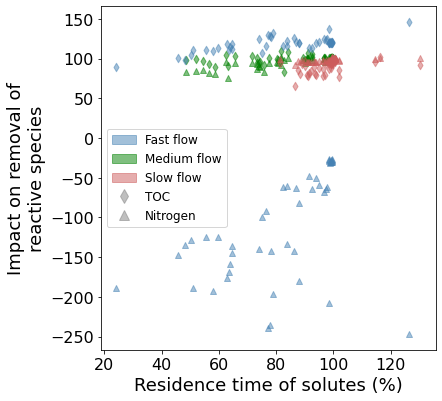

In [10]:
patchlist = [blue_patch, green_patch, red_patch, empty_square, grey_triangle]
#Plotting
finaldata = mfdata_comparison
gvarnames = finaldata.Chem.unique().tolist()
regimes = finaldata.Regime.unique().tolist()
plt.figure(figsize = (6,6))
for r in regimes:
    subset = finaldata[finaldata.Regime==r]
    for g in ["TOC", "Nitrogen"]:
        data = subset[subset.Chem==g]
        #plt.scatter(data["fraction"]*100, 100*data['reldelmassflux_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
        plt.scatter(data["fraction"]*100, 100*data['reldelconc_spatial_fraction'], c = my_pal[r], marker = mymarklist[g], facecolor = "white", alpha = 0.5, label = g)
#plt.yscale("log")
#plt.yticks((40,100,300,600), (40,100,300,600))
plt.tick_params(labelsize = 16)
plt.legend(handles = patchlist, fontsize = 12)
plt.xlabel ("Residence time of solutes (%)", fontsize = 18)
plt.ylabel("Impact on removal of\nreactive species", fontsize = 18)
plt.subplots_adjust (top = 0.92)
picname = os.path.join(output_dir, "removal_impact.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#plt.savefig(os.path.join(output_dir, "removal_impact.pdf"), bbox_inches = 'tight', pad_inches = 0.1)

### Aggregated results: Change in concentration of species: Takeaways

- Slow flow regime is not impacted by spatial heterogeneity
- Medium flow regime:
    - No impact on DO removal
    - DOC, nitrate and ammonium removal decreases with increasing heterogeneity
    - TOC is driven by the same dynamics as DOC.
- Fast flow regime:
    - DO, DOC, Ammonium removal decreases with increasing heterogeneity
    - Nitrate removal increases with heterogeneity
    - TOC removal increases - pointing to increasing export of POM/mobile microbial biomass (?) - **WIP**
    - Nitrogen removal (including POM and mobile biomass) removal is higher in the homogeneous domain. So the impact appears as negative (?). The concentration of nitrogen in the inlet is lower than that in the other scenarios while the concentration at the outlet is comparable. This is potentially a calculation mistake. - **WIP**
    
**Similar outputs are obtained if we plot impact on change in mass flux in the domain**

## Biomass: Concentration profiles-1D and 2D
* Defining the function for flux averaged concentrations of reactive species in 1D domain
* Defining the function for heatmaps of reactive species concentrations in 2D

In [18]:
def biomass2d(Trial):
    import matplotlib.gridspec as gridspec
    
    DIR = r"E:\Richards_Flow\/"
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    iaspecies = list(g for g in species if ((species[g]["State"]=="Active") and (species[g]["Location"] == "Immobile")))
    gvarnames = list(g for g in iaspecies if (g != "Immobile active sulphate reducers"))
    sptitles = ["Aerobic\ndegraders", "Nitrate\nreducers", "Ammonia\noxidizers"]
    velindex = 2
    colorscheme = 'YlGnBu'
    columntitles = ["Velocity\ndistribution pattern", "Slow flow", "Medium flow", "Fast flow"]
    fig = plt.figure(figsize=(24, 12))
    outer = gridspec.GridSpec(4, 4, width_ratios = [0.2,1, 1, 1],wspace=0.15, hspace=0.3)
    pad = 0.28
    for t in Trial:
        file = DIR + "EqualAR_0/EqualAR_0_RF-A"+str(t)+"_df.npy"
        data = np.load(file)
        left = gridspec.GridSpecFromSubplotSpec(1, 1,subplot_spec=outer[4*Trial.index(t)],wspace=0.3,hspace=0.1)
        axe=plt.Subplot(fig, left[0])
        velocity=abs(data[velindex,-1,:,:])
        sns.heatmap(velocity,cmap=colorscheme,ax=axe,cbar=False)
        axe.set_ylabel ("Variance: "+str(trialist[t]["Het"])+" &\nAnisotropy: "+str(trialist[t]["Anis"]),
                       rotation="vertical",fontsize=18,ha="center")
        axe.set_xticks([])
        axe.set_yticks([])
        fig.add_subplot(axe)
        for r in Regimes:
            i=Trial.index(t)*len(Regimes)+Regimes.index(r)+Trial.index(t)+1
            if i%4!=0:
                inner = gridspec.GridSpecFromSubplotSpec(1,3,subplot_spec=outer[i],wspace=0.3,hspace=0.1)
                file = DIR+r+"AR_0/"+r+"AR_0_RF-A"+str(t)+"_df.npy"
                data = np.load(file)
                for g in gvarnames:
                    axe=plt.Subplot(fig,inner[gvarnames.index(g)])
                    sns.heatmap (data[species[g]["TecIndex"],-1,:,:],cmap=colorscheme,ax= axe)
                    axe.set_title(sptitles[gvarnames.index(g)],fontsize=13,ha="center")
                    axe.set_xticks([])
                    axe.set_yticks([])
                    fig.add_subplot(axe)
    for a in range(1,4,1):
        plt.annotate(columntitles[a],xy=(0.05, 0.05),xytext=(0.28 + (a-1)*pad, 0.95),
                    xycoords='figure fraction',textcoords='figure fraction',
                    size='large',ha='center',va='baseline',fontsize = 18)
    plt.annotate(columntitles[0],xy=(0.1, 0.92),xytext=(0.1, 0.913),xycoords='figure fraction',textcoords='figure fraction',size='large',ha='center',va='baseline',fontsize=18)
#    fig.show()
#picname = "Y:/Home/khurana/4. Publications/Restructuring/Paper1/Figurecodes/FigureB4_immobile_biomass_heatmaps.png"
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#picname = "Y:/Home/khurana/4. Publications/Restructuring/Paper1/Figurecodes/FigureB4_immobile_biomass_heatmaps.pdf"
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

    return None


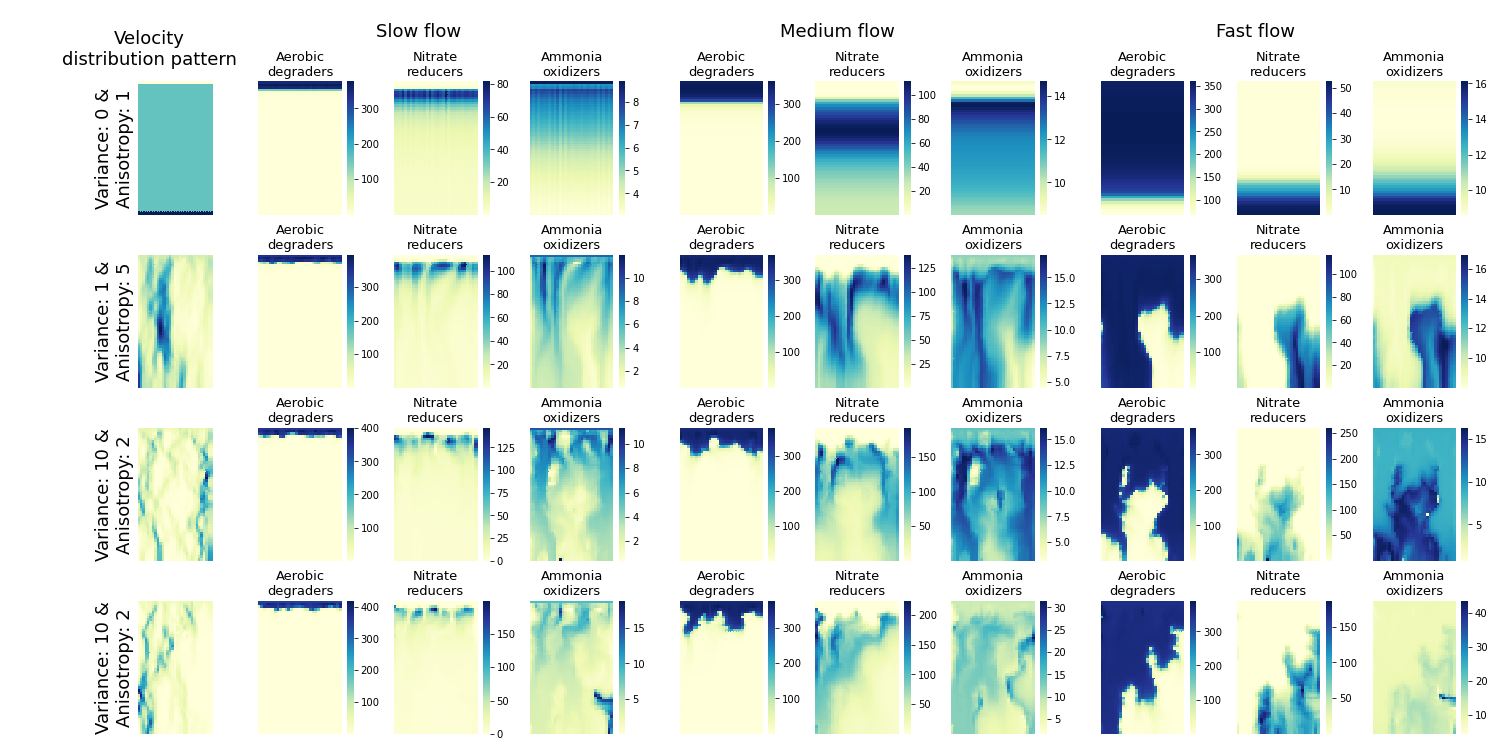

In [12]:
biomass2d(["H","50","73","61"])

### Biomass: 2D profile: Takeaways
- Biomass is distributed as expected and similar to saturated flow regime.
- Aerobes are persistent along preferential flowpaths where DO and DOC are also available.
- Nitrate reducers are persistent in low permeable regions where DO is not available to suppress their growth.
- Ammonia oxidizers are persistent in low permeable regions where DO concentration drops.

## Aggregated results: Biomass

### Import data and explore values

In [14]:
filename = "biomass_16022021.csv"
mfdata = pd.read_csv(os.path.join(results_dir, filename), sep = "\t")
print(mfdata.shape)
print(mfdata.columns)
filename = "biomass_comparison_16022021.csv"
allbiomassdata = pd.read_csv(os.path.join(results_dir, filename), sep = "\t")
print(allbiomassdata.shape)
print(allbiomassdata.columns)

(2352, 9)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Time', 'fraction'],
      dtype='object')
(2352, 13)
Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Time', 'fraction', 'spatial_biomass_base',
       'spatial_biomass_contribution_base', 'biomass_spatial_fraction',
       'biomass_contribution_spatial_fraction'],
      dtype='object')


In [15]:
# How many regimes and what are they called? Which chemical species?
print(mfdata.Regime.unique())
print(mfdata.Chem.unique())
print(allbiomassdata.Regime.unique())
print(allbiomassdata.Chem.unique())

['Medium' 'Fast' 'Slow']
['Immobile active aerobic degraders' 'Immobile active nitrate reducers'
 'Immobile active sulphate reducers' 'Immobile active ammonia oxidizers'
 'Mobile active aerobic degraders' 'Mobile active nitrate reducers'
 'Mobile active sulphate reducers' 'Mobile active ammonia oxidizers'
 'Immobile inactive aerobic degraders'
 'Immobile inactive nitrate reducers'
 'Immobile inactive sulphate reducers'
 'Immobile inactive ammonia oxidizers' 'Mobile inactive aerobic degraders'
 'Mobile inactive nitrate reducers' 'Mobile inactive sulphate reducers'
 'Mobile inactive ammonia oxidizers']
['Medium' 'Fast' 'Slow']
['Immobile active aerobic degraders' 'Immobile active nitrate reducers'
 'Immobile active sulphate reducers' 'Immobile active ammonia oxidizers'
 'Mobile active aerobic degraders' 'Mobile active nitrate reducers'
 'Mobile active sulphate reducers' 'Mobile active ammonia oxidizers'
 'Immobile inactive aerobic degraders'
 'Immobile inactive nitrate reducers'
 'Immobi

## Aggregate results: Biomass: Overall distribution between different fractions of microbial biomass

### Explore fractions between active immobile, active mobile, inactive immobile and inactive mobile biomass

Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Time', 'fraction', 'spatial_biomass_base',
       'spatial_biomass_contribution_base', 'biomass_spatial_fraction',
       'biomass_contribution_spatial_fraction'],
      dtype='object')
['Immobile active aerobic degraders', 'Immobile active nitrate reducers', 'Immobile active ammonia oxidizers', 'Mobile active aerobic degraders', 'Mobile active nitrate reducers', 'Mobile active ammonia oxidizers', 'Immobile inactive aerobic degraders', 'Immobile inactive nitrate reducers', 'Immobile inactive ammonia oxidizers', 'Mobile inactive aerobic degraders', 'Mobile inactive nitrate reducers', 'Mobile inactive ammonia oxidizers']


Text(0, 0.5, 'Contribution to total biomass (%)')

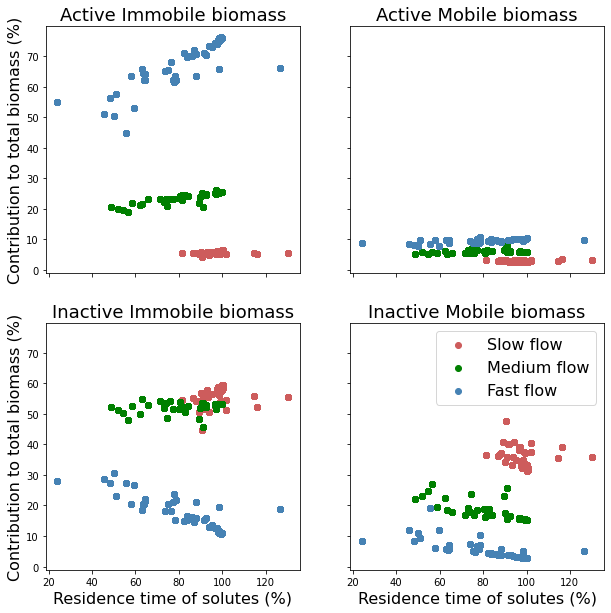

In [16]:
#Reactive species of concerns
States = ["Active", "Inactive"]
Locations = ["Mobile", "Immobile"]
allspecies = proc.speciesdict("Unsaturated")
microbialspecies = list(t for t in allspecies.keys() if allspecies[t]["State"] in States)
print(allbiomassdata.columns)
allbiomassdata['Regime'] = allbiomassdata['Regime'].replace({'Equal':'Medium'})
biomassdata = allbiomassdata
uniquespecies = biomassdata.Chem.unique().tolist()
for s in uniquespecies:
    biomassdata.loc[biomassdata.Chem == s, 'State'] = allspecies[s]["State"]
    biomassdata.loc[biomassdata.Chem == s, 'Location'] = allspecies[s]['Location']
col_dit = {'Slow':'indianred', 'Medium':'g', 'Fast':'steelblue'}
uniquespecies.remove('Immobile active sulphate reducers')
uniquespecies.remove('Immobile inactive sulphate reducers')
uniquespecies.remove('Mobile active sulphate reducers')
uniquespecies.remove('Mobile inactive sulphate reducers')
print(uniquespecies)
x = biomassdata.groupby(['Regime','Trial','State', 'Location'], as_index=False)['Biomass_contribution'].sum()
x = pd.merge(x, biomassdata[['Regime', 'Trial', 'Time', 'fraction']], on = ['Regime', 'Trial'])
fig, axeses = plt.subplots(2,2, sharex = True, sharey = True, figsize = (10,10))
i = 0
for a in ["Active", "Inactive"]:
    for l in ["Immobile", "Mobile"]:
        subdata = x[(x.State == a) & (x.Location == l)]
        ax = axeses.flat[i]
        ax.set_title(a + " " + l + " biomass", fontsize = 18)
        for r in ["Slow", "Medium", "Fast"]:
            data = subdata[subdata.Regime == r]
            ax.scatter(100*data.fraction, 100*data.Biomass_contribution, c = col_dit[r], label = r + " flow")
        i += 1
ax.legend(fontsize = 16)
axeses.flat[2].set_xlabel ("Residence time of solutes (%)", fontsize = 16)
axeses.flat[3].set_xlabel ("Residence time of solutes (%)", fontsize = 16)
axeses.flat[0].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
axeses.flat[2].set_ylabel ("Contribution to total biomass (%)", fontsize = 16)
#plt.savefig(os.path.join(data_dir, "FigureS9_contribution_state_location_biomass.png"), dpi = 300)

### Takeaways

- Active immobile biomass contributes the highest to the total biomass in the fast flow regime. It decreases with increasing heterogeneity. The rate of reduction varies with the flow regime. The rate of reduction is the highest in the fast flow regime. Then in the medium flow regime, and there is almost no impact in the slow flow regime.
- *Minimal impact of heterogeneity and flow regime on active mobile biomass.*
- Inactive immobile biomass contributes the lowest in the fast flow regime (compared to the other flow regimes). Its contribution increases with spatial heterogeneity in the fast flow regime. The contribution of this fraction in medium and slow flow regimes is not affected by spatial heterogeneity.
- Inactive mobile biomass contributes the most to the total biomass in the slow flow regime (compared to other flow regimes). Inactive mobile biomass increases with spatial heterogeneity in all flow regimes, at seemingly the same rate (visual observation).
- Spatial heterogenetiy results in a shift from active immobile biomass to inactive immobile biomass in the fast flow regime, and inactive mobile biomass in the slow and medium flow regimes.

### Explore fractionation according to microbial species

Index(['Trial', 'Variance', 'Anisotropy', 'Regime', 'Chem', 'Biomass',
       'Biomass_contribution', 'Time', 'fraction', 'spatial_biomass_base',
       'spatial_biomass_contribution_base', 'biomass_spatial_fraction',
       'biomass_contribution_spatial_fraction', 'State', 'Location'],
      dtype='object')
['Immobile active aerobic degraders', 'Immobile active nitrate reducers', 'Immobile active ammonia oxidizers', 'Mobile active aerobic degraders', 'Mobile active nitrate reducers', 'Mobile active ammonia oxidizers', 'Immobile inactive aerobic degraders', 'Immobile inactive nitrate reducers', 'Immobile inactive ammonia oxidizers', 'Mobile inactive aerobic degraders', 'Mobile inactive nitrate reducers', 'Mobile inactive ammonia oxidizers']


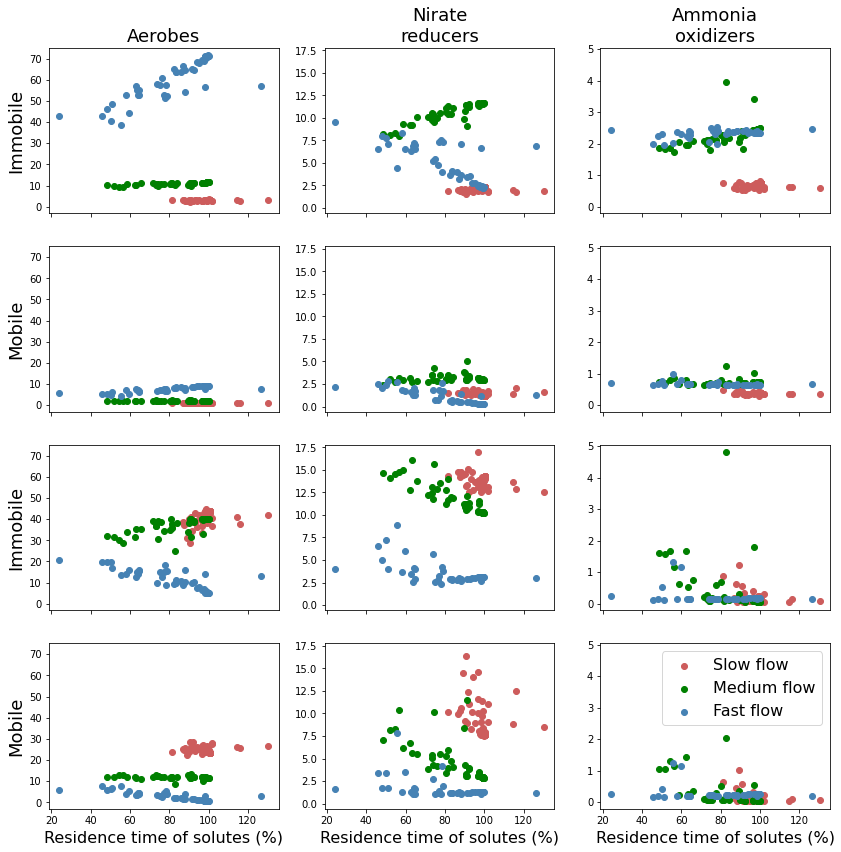

In [17]:
#Reactive species of concerns
States = ["Active", "Inactive"]
Locations = ["Mobile", "Immobile"]
allspecies = proc.speciesdict("Unsaturated")
microbialspecies = list(t for t in allspecies.keys() if allspecies[t]["State"] in States)
print(allbiomassdata.columns)
allbiomassdata['Regime'] = allbiomassdata['Regime'].replace({'Equal':'Medium'})
biomassdata = allbiomassdata
uniquespecies = biomassdata.Chem.unique().tolist()
for s in uniquespecies:
    biomassdata.loc[biomassdata.Chem == s, 'State'] = allspecies[s]["State"]
    biomassdata.loc[biomassdata.Chem == s, 'Location'] = allspecies[s]['Location']
col_dit = {'Slow':'indianred', 'Medium':'g', 'Fast':'steelblue'}
uniquespecies.remove('Immobile active sulphate reducers')
uniquespecies.remove('Immobile inactive sulphate reducers')
uniquespecies.remove('Mobile active sulphate reducers')
uniquespecies.remove('Mobile inactive sulphate reducers')
column_headers = ["Aerobes", "Nirate\nreducers", "Ammonia\noxidizers"]
left_row = ["Immobile", "Mobile", "Immobile", "Mobile"]
right_row = ["Active", "Active", "Inactive", "Inactive"]
print(uniquespecies)
fig, axeses = plt.subplots(4,3, sharex = True, sharey = 'col', figsize = (14,14))
i = 0
for g in uniquespecies:
    subdata = biomassdata[biomassdata.Chem == g]
    ax = axeses.flat[uniquespecies.index(g)]
    if uniquespecies.index(g)<3:
        ax.set_title(column_headers[uniquespecies.index(g)], fontsize = 18)
    if uniquespecies.index(g)%3==0:
        ax.set_ylabel(left_row[int(uniquespecies.index(g)/3)], fontsize = 18)
    for r in ["Slow", "Medium", "Fast"]:
        data = subdata[subdata.Regime == r]
        ax.scatter(100*data.fraction, 100*data.Biomass_contribution, c = col_dit[r], label = r + " flow")
ax.legend(fontsize = 16)
for ax in axeses[-1,:]:
    ax.set_xlabel ("Residence time of solutes (%)", fontsize = 16)
#or r in right_row:
#   plt.annotate

### Takeaways

- Fast flow regime
 - The reduction in active immobile biomass with spatial heterogeneity is attributable to reduction in active immobile aerobes. The reduced active biomass mostly shifts to the inactive fractions.
 - In contrast, active immobile nitrate reducers increase with spatial heterogeneity. while the inactive fractions remain mostly constant. This points to an overall increase in contribution of nitrate reducers to the total biomass, with increased activity due to spatial heterogeneity.
 - No impact of spatial heterogeneity on ammonia oxidizers.

- Medium flow regime
 - Aerobes are not impacted by spatial heterogeneity barring a slight decrease in the contribution of immobile inactive fraction with increasing spatial heterogeneity. Possible that the overall biomass of aerobes is decreasing as the reduction in contribution of inactive immobile aerobes is not offset by an increase in contribution by other fractions.
 - Active immobile nitrate reducers decrease with increasing spatial heterogeneity, offset by both inactive immobile and mobile fractions. This makes sense since the aerobic zone expands a bit with increasing spatial heterogeneity leading to lower nitrate reduction friendly regions.
 - Ammonia oxidizers are not affected by spatial heterogeneity.

- Slow flow regime
 - Overall, slow flow regime is impacted the least by spatial heterogeneity.
 - The contribution of inactive immobile aerobes decreases with heterogeneity, and seemingly shifts to inactive immobile and mobile fractions of nitrate reducers.
 - Contribution of ammonia oxidizers is mostly the same regardless of spatial heterogeneity.